## 데이터 중심의 지표

In [8]:
import numpy as np
import pandas as pd

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

# DataFrame의 출력을 소수점 이하 3자리로 제한
# pd.set_option(' precision', 3)

'%.3f'

In [6]:
df = pd.read_csv('/Users/anhyojun/VSCode/K-Digital Training/이성희 교수님/예제소스코드모음1/data/ch2_scores_em.csv',
                 index_col = 'student number')

# df의 처음 5행을 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [7]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [10]:
scores_df = pd.DataFrame({'score' : scores},
                         index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                          name = 'student'))

scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## 평균값

In [12]:
sum(scores) / len(scores)

55.000

In [13]:
np.mean(scores)

55.000

In [14]:
scores_df.mean()

score    55.0
dtype: float64

## 중앙값

In [15]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [16]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

56.500

## 최빈값

In [17]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

## 분산과 표준편차

In [18]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [19]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [20]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [21]:
np.mean(deviation ** 2)

86.000

In [23]:
np.var(scores)

86.000

In [24]:
scores_df.var()

score    95.555556
dtype: float64

In [28]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [27]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

## 범위와 사분위 범위

In [29]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

## 데이터의 정규화

In [30]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [32]:
np.mean(z), np.std(z, ddof = 0) # ddof : 자유도

(-0.000, 1.000)

In [33]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [34]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


## 데이터의 시각화

In [35]:
# 50명의 영어 점수 array
english_scores = np.array(df['english'])

# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

## 도수분포표

In [37]:
freq = np.histogram(english_scores, bins = 10, range = (0, 100))
freq

(array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

In [36]:
freq, _ = np.histogram(english_scores, bins = 10, range = (0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [38]:
values = 1, 2, 3, 4, 5
a, b, *_ = values

In [39]:
a, b

(1, 2)

In [40]:
values = 1, 2, 3, 4, 5
a, b, _ = values

ValueError: too many values to unpack (expected 3)

In [41]:
values = 1, 2, 3
a, b, _ = values

In [42]:
a, b

(1, 2)

In [46]:
freq, _ = np.histogram(english_scores, bins = 10, range = (0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [47]:
# 0~10, 10~20, ... 이라는 문자열 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]

# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency' : freq},
                            index = pd.Index(freq_class,
                                             name = 'class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [48]:
for a in range(7):
    print(a)

0
1
2
3
4
5
6


In [49]:
for a in range(10, 5, -1):
    print(a)

10
9
8
7
6


In [50]:
for a in range(20, 31, 2):
    print(a)

20
22
24
26
28
30


In [51]:
total = 0
for i in range(1, 10):
    total = total + i
print(total)

45


In [52]:
total = 0
for i in range(1, 10, 2):
    total = total + i
print(total)

25


In [53]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [54]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [55]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [57]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',
                             'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [58]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

## 히스토그램

In [62]:
# Matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt

# 그래프가 Jupyter notebook 위에 표시
%matplotlib inline

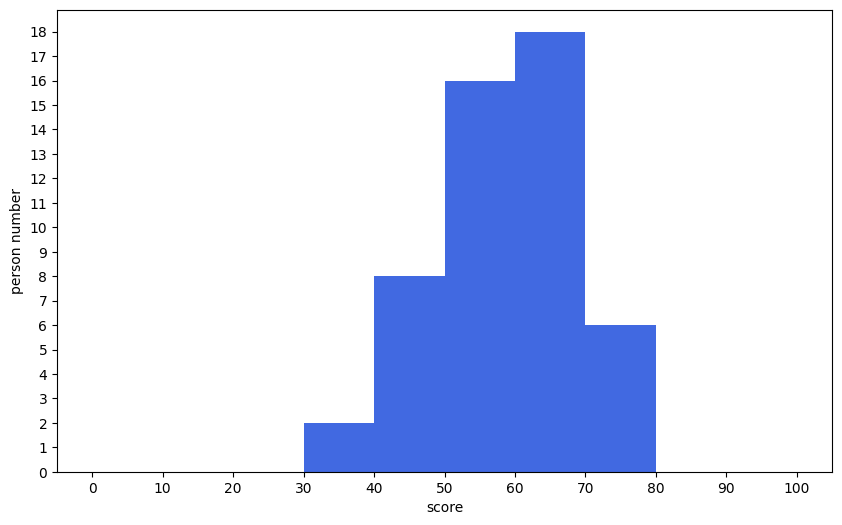

In [69]:
# 캔버스를 생성
# figsize로 가로 세로 크기를 지정
fig = plt.figure(figsize = (10, 6))
# 캔버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1 x 1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins = 10, range = (0, 100), color = 'royalblue')
# x축에 레이블 부여
ax.set_xlabel('score')
# y축에 레이블 부여
ax.set_ylabel('person number')
# x축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
# y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))
# 그래프 표시
plt.show()

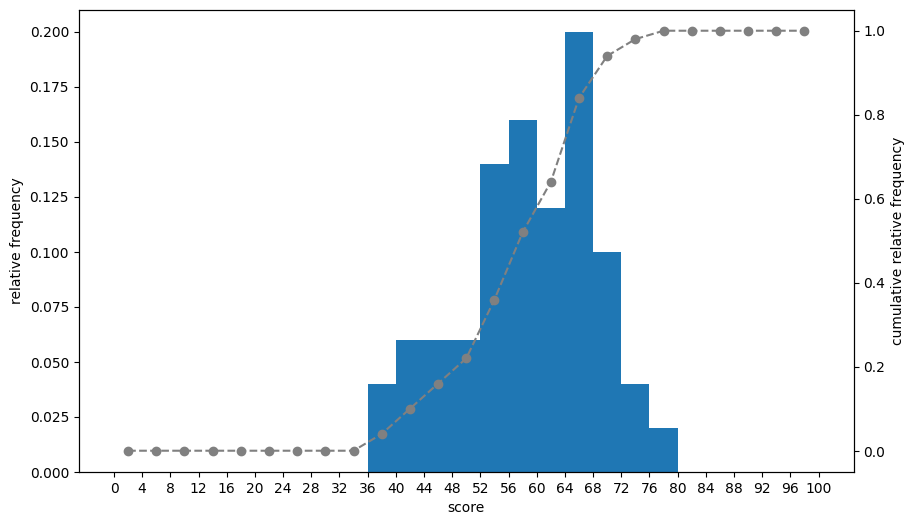

In [70]:
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(111)
# y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눔
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins = 25,
                          range = (0, 100), weights = weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그림
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,
         ls = '--', marker = 'o', color = 'gray')
# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible = False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

## 상자그림

/var/folders/hf/j1jp3r4x3mgcms3hl1xy7krh0000gn/T/ipykernel_14123/690435960.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(english_scores, labels = ['english'])


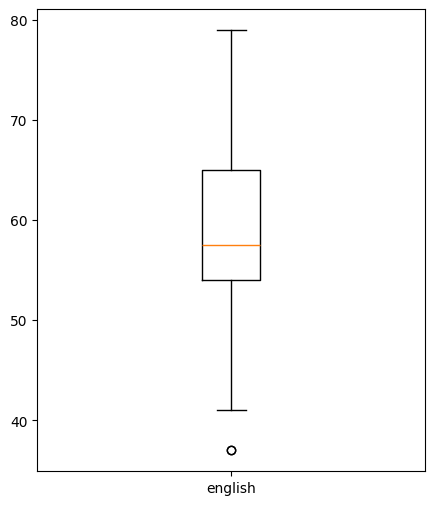

In [71]:
fig = plt.figure(figsize = (5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels = ['english'])

plt.show()

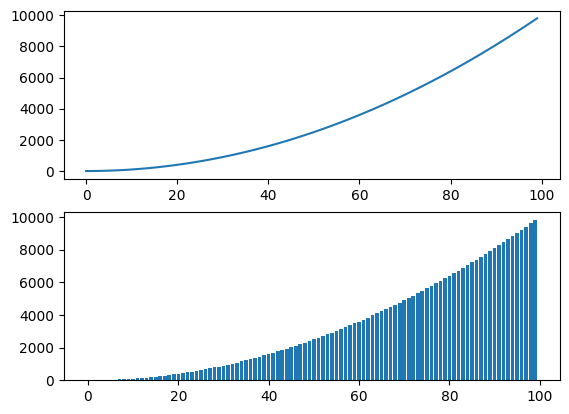

In [72]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

x = range(0, 100)
y = [v*v for v in x]

ax1.plot(x, y)
ax2.bar(x, y)
plt.show()

## 2차원 데이터 정리

In [73]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english' : en_scores,
                          'mathematics' : ma_scores},
                          index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                           name = 'student'))

scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


## 공분산

In [76]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = \
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = \
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] = \
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [77]:
summary_df['product of deviations'].mean()

62.800

In [78]:
cov_mat = np.cov(en_scores, ma_scores, ddof = 0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [79]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800, 62.800)

## 상관계수

In [80]:
np.cov(en_scores, ma_scores, ddof = 0)[0, 1] /\
    (np.std(en_scores) * np.std(ma_scores))

0.819

In [81]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [82]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


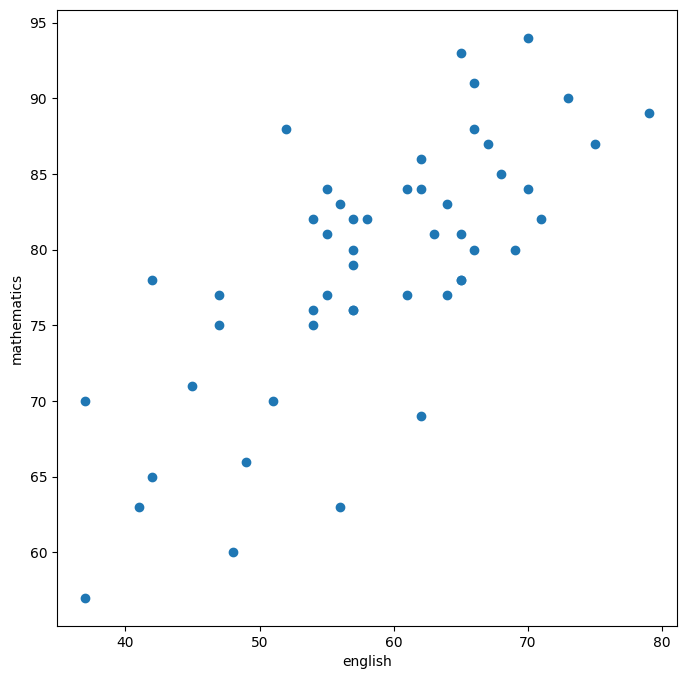

In [83]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

## 회귀직선

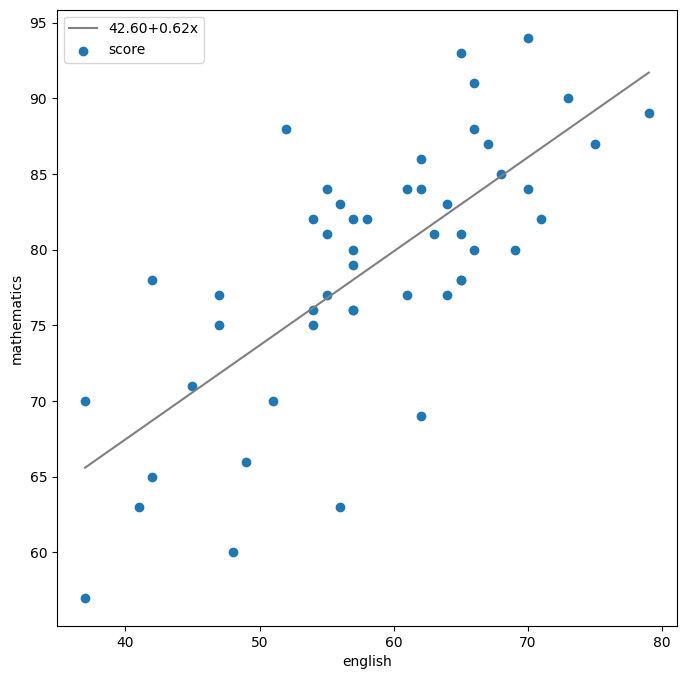

In [84]:
# 계수 beta_0과 beta_1을 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)
# beta_0 + beta_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
ax.plot(xs, ys, color = 'gray',
        label = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(english_scores, math_scores, label = 'score')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
# 범례 표시
ax.legend(loc = 'upper left')

plt.show()

## 히트맵

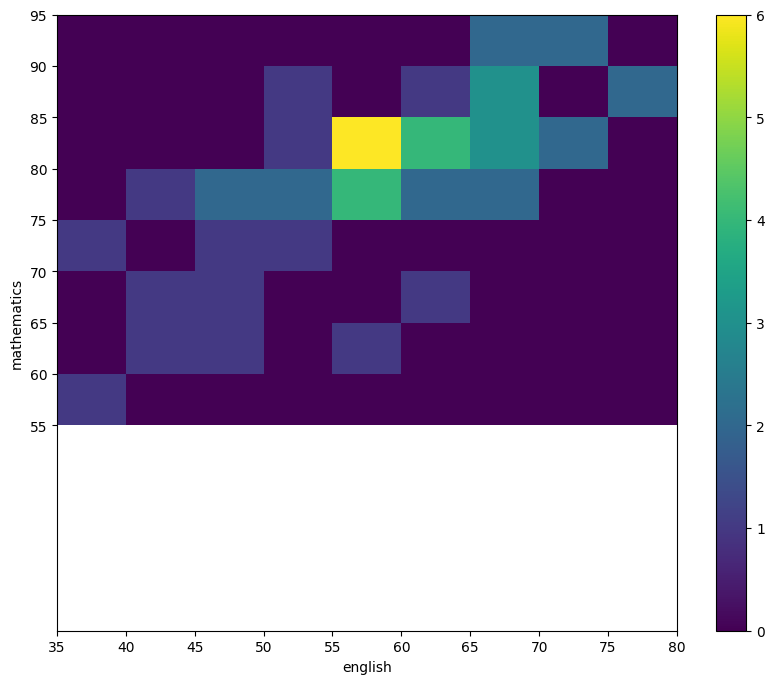

In [85]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins = [9, 8], range = [(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_yticks(c[1])
ax.set_yticks(c[2])
# 컬러 바 표시
fig.colorbar(c[3], ax = ax)
plt.show()

## 앤스컴의 예

In [103]:
data = np.load('/Users/anhyojun/VSCode/K-Digital Training/이성희 교수님/예제소스코드모음1/data/ch3_anscombe.npy')

In [106]:
data1 = data[0]
data2 = data[1]
data3 = data[2]
data4 = data[3]

In [110]:
data1_x = [i[0] for i in data1]
data1_y = [i[1] for i in data1]

In [112]:
poly_fit1 = np.polyfit(data1_x, data1_y, 1)
poly_fit1



array([0.5, 3. ])

In [118]:
poly1d_1 = np.poly1d(poly_fit1)
poly1d_1(1)

3.500

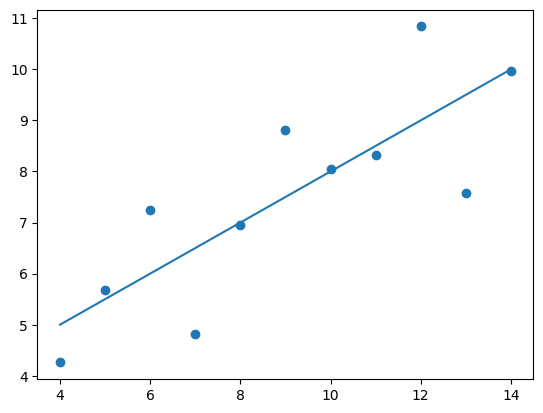

In [119]:
plt.scatter(data1_x, data1_y)
plt.plot([np.min(data1_x), np.max(data1_x)], [poly1d_1(np.min(data1_x)), poly1d_1(np.max(data1_x))])
plt.show()